In [6]:
# DAL Library
# version 0.1.0

source("load_harbinger.R")

#loading Harbinger
load_harbinger() # see ../load_harbinger.R 

In [7]:
load_library("reticulate")
source("ts_tlstm.R")
reticulate::source_python("ts_tlstm.py")

In [8]:
#loading the example database
data(har_examples)

In [9]:
#Using the time series 1 
dataset <- har_examples[[1]]
head(dataset)

serie     event
1 1.0000000 FALSE
2 0.9689124 FALSE
3 0.8775826 FALSE
4 0.7316889 FALSE
5 0.5403023 FALSE
6 0.3153224 FALSE

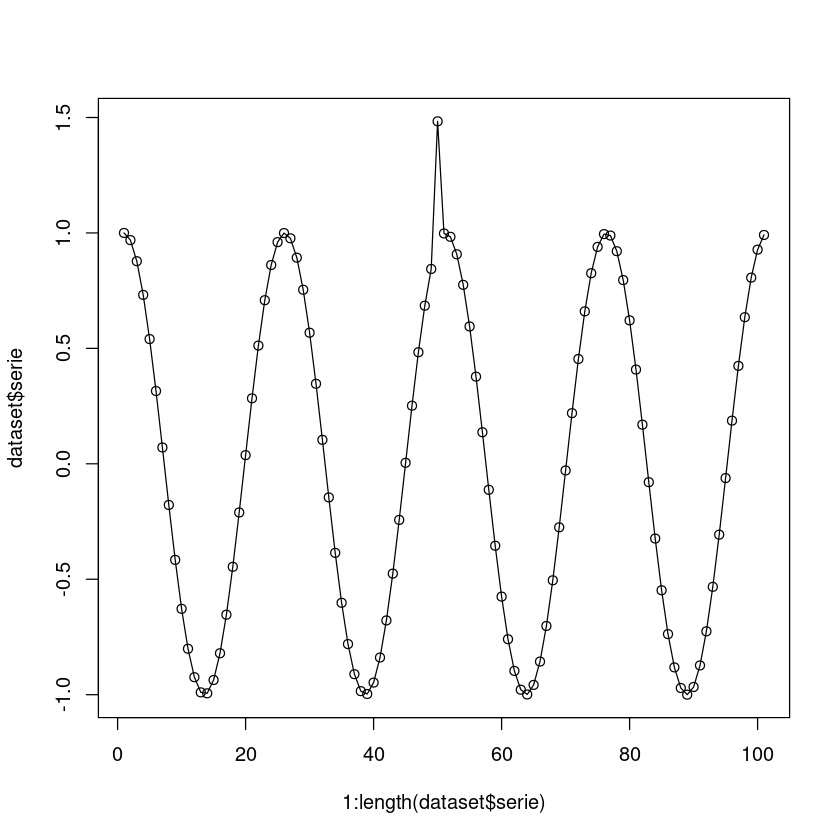

In [10]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [11]:
# establishing arima method 
  model <- har_tsreg_sw(ts_tlstm(ts_gminmax(), input_size=4, epochs=10000))

In [12]:
# fitting the model
  model <- fit(model, dataset$serie)

ts_tlstm,0.028



[1] "ts_tlstm"


In [13]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [14]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

  idx event    type
1  50  TRUE anomaly


In [15]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      1     0    
FALSE     0     100  


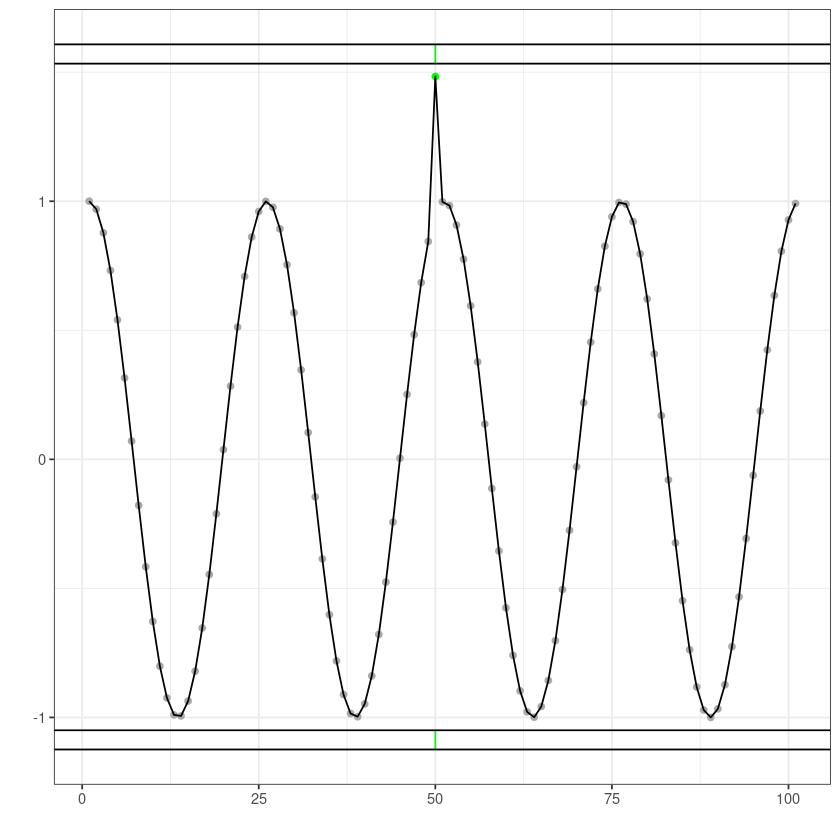

In [16]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)